In [3]:
import os
import numpy as np
import pandas as pd
import math
from matplotlib import pyplot as plt

In [6]:
def isfloat(num):
    try:
        float(num)
        return True
    except ValueError:
        return False

In [4]:
def deletCols(df, keep):
    remove = []
    for i in range(len(df.columns)):
        column = df.columns[i]
        if(column not in keep):
            remove.append(column)

    return df.drop(remove, axis=1)

def renameCols(df, suffix):
    for column in df.columns:
        df = df.rename(columns={column: f'{column}_{suffix}'})
    
    return df

def setCol(df, idx):
    df.columns = df.iloc[idx]
    df = df.drop(df.index[idx])

    return df

def dfStringToNum(df):
    for i in range(df.shape[0]): #iterate over rows
        for j in range(df.shape[1]): #iterate over columns
            value = df.iat[i, j] #get cell value
            if (not (value.isnumeric() or isfloat(value))):
                df.iat[i, j] = 0
    return df

def dropNAN(df):
    for i in range(df.shape[0]): #iterate over rows
        for j in range(df.shape[1]): #iterate over columns
            value = df.iat[i, j] #get cell value
            if (not (value.isnumeric() or isfloat(value))):
                df.iat[i, j] = np.nan
    return df
    

<h3>GHG For Every Country</h3>

In [7]:
countries = []
#Transposing Data
ghg = pd.read_csv("Macro/GHG Energy.csv")
#reset column header to year
ghg.columns = ghg.iloc[2]
ghg = ghg.reset_index(drop=True)
ghg.columns.name = None
#move years (the current column header) to the index
ghg = ghg.transpose()
#set country names as column headers
ghg = setCol(ghg, 0)
#remove name
ghg.columns.name = None
#remove all columns with header name null
ghg = ghg.loc[:, ghg.columns.notnull()]

#Remove columns
col_keep = ["World"]
start = 0
end = 0

for i in range(len(ghg.columns)):
    column = ghg.columns[i]
    if column == "Canada":
        start = i
    if column == "Middle East":
        end = i

for i in range(start, end):
    col_keep.append(ghg.columns[i])

countries = col_keep
countries.pop(countries.index("Kosovo"))

ghg = deletCols(ghg, col_keep)

ghg = renameCols(ghg, "ghg")
ghg = dfStringToNum(ghg)

ghg.head()

,World_ghg,Canada_ghg,Chile_ghg,Mexico_ghg,United States_ghg,OECD Americas_ghg,Australia_ghg,Israel_ghg,Japan_ghg,Korea_ghg,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1971,16121,366,22,118,4581,5118,151,14,762,56,...,1,65,5,13,13,88,13,36,1,525
1972,16840,385,22,131,4825,5395,157,15,799,58,...,2,66,5,13,14,104,14,40,1,533
1973,17771,404,21,143,4987,5589,166,16,909,72,...,2,59,7,13,15,124,14,46,2,561
1974,17722,413,21,156,4823,5448,181,16,896,75,...,2,48,7,13,15,139,17,51,2,558
1975,17768,404,18,163,4631,5249,189,17,860,82,...,2,40,6,13,17,142,22,56,2,579


<h3>Investment: R&D per thousands of GDP</h3>

In [8]:
rd = pd.read_csv("Macro/R&D.csv")
rd = setCol(rd, 0)

for index, row in rd.iterrows():
    if(row["Indicator"].strip() != "RD&D per thousand units of GDP"):
        rd = rd.drop(index)

rd = rd.drop(columns="Indicator")
rd.columns.name = None
rd = rd.transpose()
rd = setCol(rd, 0)
for column in rd.columns:
    if(column not in countries):
        rd = rd.drop(column, axis=1)
rd.columns.name = None
rd = rd.drop(rd.index[-1])
rd = renameCols(rd, "r&d")
rd = dfStringToNum(rd)

rd.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Norway_r&d,Poland_r&d,Portugal_r&d,Slovak Republic_r&d,Spain_r&d,Sweden_r&d,Switzerland_r&d,Turkey_r&d,United Kingdom_r&d,United States_r&d
1974,0,0,1.262,0,0.854,0,0,0,0,0,...,0.154,0,0,0,0.311,0.227,0.043,0,1.033,0.523
1975,0,0,1.456,0,0.782,0,0.215,0,0,0,...,0.092,0,0,0,0.304,0.57,0.054,0,1.015,0.727
1976,0,0,1.329,0,0.778,0,0.223,0,0,0,...,0.093,0,0,0,0.305,0.498,0.068,0,1.022,0.811
1977,0,0.321,1.098,0,0.824,0,0.328,0,0,0,...,0.103,0,0,0,0.238,0.649,0.177,0,0.821,1.183
1978,0,0.398,0.84,0,1.023,0,0.41,0,0,0,...,0.649,0,0,0,0.292,0.784,0.368,0,0.961,1.302


In [1023]:
df = rd.join(ghg)
df.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Jordan_ghg,Kuwait_ghg,Lebanon_ghg,Oman_ghg,Qatar_ghg,Saudi Arabia_ghg,Syrian Arab Republic _ghg,United Arab Emirates_ghg,Yemen_ghg,Africa_ghg
1974,0,0,1.262,0,0.854,0,0,0,0,0,...,2,48,7,13,15,139,17,51,2,558
1975,0,0,1.456,0,0.782,0,0.215,0,0,0,...,2,40,6,13,17,142,22,56,2,579
1976,0,0,1.329,0,0.778,0,0.223,0,0,0,...,3,41,5,15,16,176,24,66,2,650
1977,0,0.321,1.098,0,0.824,0,0.328,0,0,0,...,3,40,5,15,14,189,25,67,2,674
1978,0,0.398,0.84,0,1.023,0,0.41,0,0,0,...,3,45,6,4,16,190,23,57,2,667


In [1024]:
for i in df.columns:
    df[i] = df[i].astype(float)

df.index = df.index.astype(int)

In [846]:
def getRdGhgList(country):
    rd_list = df[f"{country}_r&d"].tolist()
    ghg_list = df[f"{country}_ghg"].tolist()
    year_list = df.index.tolist()
    
    return [rd_list, ghg_list, year_list]

def getRdGhgDf(country):
    df[f"{country}_r&d"] = df[f"{country}_r&d"].astype(float)
    df[f"{country}_ghg"] = df[f"{country}_ghg"].astype(float)
    return df[[f"{country}_r&d", f"{country}_ghg"]]


<AxesSubplot:xlabel='Canada_r&d', ylabel='Canada_ghg'>

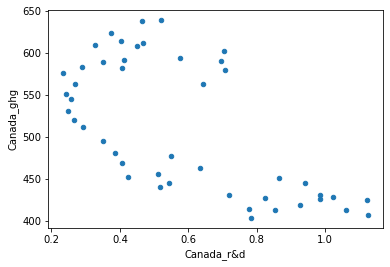

In [847]:
test = getRdGhgDf("Canada")
test.plot(kind="scatter", x="Canada_r&d", y="Canada_ghg")

<h3>Our World in Data</h3>

In [984]:
owid = pd.read_csv("Macro/owid-energy-data.csv")
owid

,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,energy_cons_change_pct,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,AFG,Afghanistan,1900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1901,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AFG,Afghanistan,1902,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AFG,Afghanistan,1903,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AFG,Afghanistan,1904,NaN,0.000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,-0.789,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,-14.633,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [849]:
def binarySearch(arr, start, end, val):
    if(start <= end):
        mid = math.floor((start + end) / 2)
        if arr[mid] > val:
            #we can - 1 since we have just checked the mid index
            return binarySearch(arr, start, mid - 1, val)
        elif arr[mid] < val:
            return binarySearch(arr, mid + 1, end, val)
        else:
            return mid


In [982]:
def getOwidCountry(df, country):
    row_num = binarySearch(df["country"], 0, len(df["country"]) - 1, country)
    year_of_row = df.iloc[row_num]["year"]
    start_slice = year_of_row - 1900
    end_slice = 2020 - year_of_row
    df = df.iloc[row_num - start_slice : end_slice + row_num + 1]
    extra = []
    for i in range(df.shape[0]):
        if str(df.iloc[[i]]["country"].values[0]) != country:
            extra.append(df.iloc[[i]].index.values[0])

    return df.drop(extra)

<AxesSubplot:xlabel='year'>

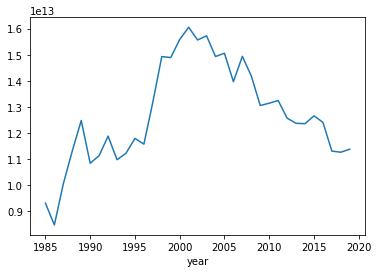

In [851]:
c = getOwidCountry("Canada")
c = c.set_index(c["year"])
c.columns.name = None

def getProductionConsumption(energy_type, production, df):
    start = df.index.values[0]
    country = df["country"][start]
    if production:
        df[f"{energy_type}_electricity_{country}"] = df[f"{energy_type}_electricity"]
        return df[f"{energy_type}_electricity_{country}"]
    else:
        arr = []
        for i in range(df.shape[0]):
            total_elec = df["per_capita_electricity"][start+i] * df["population"][start+i]
            arr.append(total_elec * df[f"{energy_type}_share_elec"][start+i])
        df[f"elec_consumption_{energy_type}_{country}"] = arr
        return df[f"elec_consumption_{energy_type}_{country}"]

test = getProductionConsumption("fossil", False, c)
test.dropna().plot()


In [ ]:
owid_ghg = pd.read_csv("Macro/owid-co2-data.csv")
# owid_ghg = owid_ghg.set_index(owid_ghg['year'])
# owid_ghg = owid_ghg[["country", "co2", "year"]]
owid_ghg

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,0.002,NaN,...,NaN,NaN,NaN,NaN,NaN,7624058.0,NaN,NaN,NaN,NaN
1,AFG,Afghanistan,1950,0.084,NaN,475.00,0.070,NaN,0.011,NaN,...,NaN,NaN,NaN,NaN,NaN,7752117.0,9.421400e+09,NaN,NaN,NaN
2,AFG,Afghanistan,1951,0.092,NaN,8.70,0.007,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7840151.0,9.692280e+09,NaN,NaN,NaN
3,AFG,Afghanistan,1952,0.092,NaN,0.00,0.000,NaN,0.012,NaN,...,NaN,NaN,NaN,NaN,NaN,7935996.0,1.001732e+10,NaN,NaN,NaN
4,AFG,Afghanistan,1953,0.106,NaN,16.00,0.015,NaN,0.013,NaN,...,NaN,NaN,NaN,NaN,NaN,8039684.0,1.063052e+10,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25199,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,0.866,...,4.703,11.92,0.85,6.55,0.467,14030338.0,2.096179e+10,47.5,3385.574,1.889
25200,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,0.790,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
25201,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,0.912,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN
25202,ZWE,Zimbabwe,2019,10.949,12.422,-7.64,-0.905,1.473,0.748,0.848,...,NaN,NaN,NaN,NaN,NaN,14645473.0,NaN,NaN,NaN,NaN


<h3>Full Data</h3>

In [1185]:
for i in owid['country'].unique():
    if i not in owid_ghg['country'].unique():
        countries.append(i)

In [1199]:
append_owid = owid
for index, row in append_owid.iterrows():
    if row["country"] not in countries:
        append_owid = append_owid.drop(owid.index[index])
    elif row["year"] < 2000 or row["year"] > 2019 or (row['year'] == 2020 and owid.iloc[index-1] < 1999):
        append_owid = append_owid.drop(owid.index[index])

append_owid = append_owid.reset_index()


In [1200]:
append_owid

,index,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,oil_prod_change_twh,...,solar_elec_per_capita,solar_energy_per_capita,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita
0,220,NaN,Africa,2000,-0.087,-1.320,11.037,134.287,7.284,292.915,...,0.016,0.045,NaN,0.040,788.889,0.015,0.434,0.489,0.217,0.603
1,221,NaN,Africa,2001,-0.248,-3.761,3.363,45.431,-1.002,-43.243,...,0.020,0.054,NaN,0.091,134.874,0.035,0.659,1.148,0.501,1.382
2,222,NaN,Africa,2002,-1.673,-25.333,4.557,63.640,0.679,28.986,...,0.023,0.063,NaN,0.092,6.161,0.036,0.071,1.219,0.522,1.432
3,223,NaN,Africa,2003,7.458,111.037,7.425,108.417,8.758,376.609,...,0.026,0.072,NaN,0.107,20.951,0.042,0.255,1.474,0.620,1.690
4,224,NaN,Africa,2004,2.181,34.898,4.627,72.579,11.272,527.174,...,0.031,0.083,NaN,0.144,41.238,0.055,0.608,2.082,0.861,2.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3117,17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,NaN,...,0.579,NaN,2.503057e+10,0.000,NaN,NaN,NaN,NaN,0.000,NaN
3118,17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,NaN,...,0.641,NaN,2.515176e+10,0.000,NaN,NaN,NaN,NaN,0.000,NaN
3119,17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,NaN,...,0.773,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN
3120,17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,NaN,...,0.970,NaN,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN


In [1195]:
append_rd = rd[2000-1974:]
append_rd.head()

,Australia_r&d,Austria_r&d,Belgium_r&d,Brazil_r&d,Canada_r&d,Czech Republic_r&d,Denmark_r&d,Estonia_r&d,Finland_r&d,France_r&d,...,Norway_r&d,Poland_r&d,Portugal_r&d,Slovak Republic_r&d,Spain_r&d,Sweden_r&d,Switzerland_r&d,Turkey_r&d,United Kingdom_r&d,United States_r&d
2000,0,0.109,0,0,0.241,0,0.247,0,0.48,0.397,...,0.246,0,0.011,0,0.076,0.269,0.353,0.013,0.044,0.221
2001,0.206,0.136,0,0,0.256,0,0.239,0,0.434,0.287,...,0.246,0,0.007,0,0.071,0.305,0.356,0.015,0.027,0.266
2002,0,0.129,0,0,0.269,0,0.119,0,0.475,0.62,...,0.252,0,0.014,0,0.061,0.328,0.371,0.011,0.03,0.26
2003,0.176,0.108,0,0,0.29,0.063,0.123,0,0.389,0.614,...,0.237,0,0.018,0,0.069,0.322,0.376,0.011,0.027,0.24
2004,0.34,0.138,0,0,0.235,0.042,0.23,0,0.504,0.58,...,0.266,0,0.02,0,0.051,0.327,0.32,0.002,0.037,0.237


In [1201]:
list_to_append = []
for i in range(0, append_owid.shape[0], 20):
    if append_owid.iloc[i]["year"] != 2000:
        print(append_owid.iloc[i])
    country = append_owid.iloc[i]["country"]
    if country+"_r&d" in append_rd.columns.values:
        for value in append_rd[country+"_r&d"].to_list():
            list_to_append.append(float(value))
    else:
        for i in range(20):
            list_to_append.append(np.NaN)

append_owid['rd'] = list_to_append

index                        4548
iso_code                      DNK
country                   Denmark
year                         2003
coal_prod_change_pct            0
                           ...   
wind_share_energy           5.986
wind_cons_change_twh        1.777
wind_consumption            15.15
wind_elec_per_capita       1032.3
wind_energy_per_capita    2812.25
Name: 700, Length: 123, dtype: object
index                                   4669
iso_code                                 DOM
country                   Dominican Republic
year                                    2003
coal_prod_change_pct                     NaN
                                 ...        
wind_share_energy                        NaN
wind_cons_change_twh                     NaN
wind_consumption                         NaN
wind_elec_per_capita                       0
wind_energy_per_capita                   NaN
Name: 720, Length: 123, dtype: object
index                               4724
iso_code      

ValueError: Length of values (3140) does not match length of index (3122)

In [1189]:
append_ghg = owid_ghg
for index, row in append_ghg.iterrows():
    if row["country"] not in countries:
        append_ghg = append_ghg.drop(owid_ghg.index[index])
    elif row["year"] < 2000 or row["year"] > 2019:
        append_ghg = append_ghg.drop(owid_ghg.index[index])

append_ghg = append_ghg.reset_index()

In [1194]:
append_ghg

,index,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,population,gdp,primary_energy_consumption,energy_per_capita,energy_per_gdp
0,188,NaN,Africa,2000,886.562,620.049,6.76,56.165,-266.512,1.094,...,NaN,NaN,NaN,NaN,NaN,810984230.0,NaN,3192.725,3936.853,NaN
1,189,NaN,Africa,2001,884.168,608.520,-0.27,-2.394,-275.648,1.064,...,NaN,NaN,NaN,NaN,NaN,830902539.0,NaN,3317.609,3992.775,NaN
2,190,NaN,Africa,2002,892.575,600.140,0.95,8.406,-292.434,1.049,...,NaN,NaN,NaN,NaN,NaN,851298437.0,NaN,3354.459,3940.405,NaN
3,191,NaN,Africa,2003,967.220,668.371,8.36,74.645,-298.849,1.109,...,NaN,NaN,NaN,NaN,NaN,872248336.0,NaN,3513.656,4028.276,NaN
4,192,NaN,Africa,2004,1036.686,716.243,7.18,69.466,-320.442,1.160,...,NaN,NaN,NaN,NaN,NaN,893842786.0,NaN,3765.085,4212.245,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,25198,ZWE,Zimbabwe,2015,12.226,13.350,2.69,0.320,1.124,0.885,...,4.885,11.87,0.859,6.68,0.484,13814642.0,2.102746e+10,55.642,4027.628,2.223
2536,25199,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,...,4.703,11.92,0.850,6.55,0.467,14030338.0,2.096179e+10,47.500,3385.574,1.889
2537,25200,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,...,NaN,NaN,NaN,NaN,NaN,14236599.0,2.194784e+10,NaN,NaN,NaN
2538,25201,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,...,NaN,NaN,NaN,NaN,NaN,14438812.0,2.271535e+10,NaN,NaN,NaN


In [1215]:
append_co2 = append_ghg[['co2']]
append_owid = append_owid[append_owid['country'] != "Gibraltar"]
append_owid = append_owid.reset_index(drop=True)
test = append_owid
append_owid["co2"] = append_co2

In [1219]:
append_owid

,Unnamed: 0,index,iso_code,country,year,coal_prod_change_pct,coal_prod_change_twh,gas_prod_change_pct,gas_prod_change_twh,oil_prod_change_pct,...,gdp,wind_share_elec,wind_cons_change_pct,wind_share_energy,wind_cons_change_twh,wind_consumption,wind_elec_per_capita,wind_energy_per_capita,rd,co2
0,0,220,NaN,Africa,2000,-0.087,-1.320,11.037,134.287,7.284,...,NaN,0.040,788.889,0.015,0.434,0.489,0.217,0.603,NaN,886.562
1,1,221,NaN,Africa,2001,-0.248,-3.761,3.363,45.431,-1.002,...,NaN,0.091,134.874,0.035,0.659,1.148,0.501,1.382,NaN,884.168
2,2,222,NaN,Africa,2002,-1.673,-25.333,4.557,63.640,0.679,...,NaN,0.092,6.161,0.036,0.071,1.219,0.522,1.432,NaN,892.575
3,3,223,NaN,Africa,2003,7.458,111.037,7.425,108.417,8.758,...,NaN,0.107,20.951,0.042,0.255,1.474,0.620,1.690,NaN,967.220
4,4,224,NaN,Africa,2004,2.181,34.898,4.627,72.579,11.272,...,NaN,0.144,41.238,0.055,0.608,2.082,0.861,2.330,NaN,1036.686
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2535,2555,17427,ZWE,Zimbabwe,2015,-25.013,-10.847,NaN,NaN,NaN,...,2.503057e+10,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,12.226
2536,2556,17428,ZWE,Zimbabwe,2016,-37.694,-12.257,NaN,NaN,NaN,...,2.515176e+10,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,10.738
2537,2557,17429,ZWE,Zimbabwe,2017,8.375,1.697,NaN,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,9.582
2538,2558,17430,ZWE,Zimbabwe,2018,22.555,4.952,NaN,NaN,NaN,...,NaN,0.000,NaN,NaN,NaN,NaN,0.000,NaN,NaN,11.854


In [1220]:
append_owid.to_csv("final_append.csv")

In [1014]:
#cleaning for owid energy data
full_df = []
all_countries = owid['country'].unique()
for country in all_countries:
    if(country in countries):
        d = getOwidCountry(owid, country)
        d = d.set_index(d["year"])
        d.columns.name = None
        d = d.drop(["year", "iso_code"], axis=1)
        for i in d.columns:
            if i != "country":
                d = d.rename(columns={i : i+f"_{country}"})
        full_df.append(d)

for i in range(1, len(full_df)):
    country = full_df[i]["country"].values[0]
    full_df[i] = full_df[i].drop("country", axis=1)
    full_df[0] = full_df[0].join(full_df[i])

final_df = full_df[0].drop("country", axis=1)

full_df[0]

,country,coal_prod_change_pct_Africa,coal_prod_change_twh_Africa,gas_prod_change_pct_Africa,gas_prod_change_twh_Africa,oil_prod_change_pct_Africa,oil_prod_change_twh_Africa,energy_cons_change_pct_Africa,energy_cons_change_twh_Africa,biofuel_share_elec_Africa,...,solar_elec_per_capita_Zimbabwe,solar_energy_per_capita_Zimbabwe,gdp_Zimbabwe,wind_share_elec_Zimbabwe,wind_cons_change_pct_Zimbabwe,wind_share_energy_Zimbabwe,wind_cons_change_twh_Zimbabwe,wind_consumption_Zimbabwe,wind_elec_per_capita_Zimbabwe,wind_energy_per_capita_Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1900,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1901,Africa,67.810,4.530,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1902,Africa,49.068,5.500,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1903,Africa,35.697,5.965,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1904,Africa,12.880,2.921,NaN,0.000,NaN,0.000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2015,Africa,-3.991,-73.097,2.653,52.707,-1.012,-45.882,1.432,70.251,NaN,...,0.579,NaN,2.503057e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2016,Africa,1.235,21.713,0.959,19.564,-5.730,-257.263,2.622,130.431,NaN,...,0.641,NaN,2.515176e+10,0.0,NaN,NaN,NaN,NaN,0.0,NaN
2017,Africa,3.647,64.936,8.873,182.702,5.572,235.821,2.256,115.188,NaN,...,0.773,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN


In [1015]:
#cleaning owid co2 data
full_df = []
all_countries = owid_ghg['country'].unique()
for country in all_countries:
    if(country in countries):
        d = getOwidCountry(owid_ghg, country)
        d = d.set_index(d["year"])
        d.columns.name = None
        d = d.drop(["year", "iso_code"], axis=1)
        for i in d.columns:
            if i != "country":
                d = d.rename(columns={i : i+f"_{country}"})
        full_df.append(d[[f"co2_{country}"]])

for i in range(1, len(full_df)):
    # country = full_df[i]["country"].values[0]
    # full_df[i] = full_df[i].drop("country", axis=1)
    full_df[0] = full_df[0].join(full_df[i])

final_df2 = full_df[0]

In [1016]:
final_df = final_df.join(final_df2)

In [1097]:
final_df.to_csv('final.csv', index=True)

In [1098]:
final = pd.read_csv("final.csv")
final = final.set_index(final['year'])
final.index.name=None
final = final.drop('year', axis=1)

In [1099]:
final = final.join(df)

In [1100]:
final = final.iloc[100:, :]

In [1]:
rd['United States_rd']

NameError: name 'rd' is not defined